## **Walmart Product Reviews Semantic Analysis : (Text Semantic Analysis)** 

In [1]:
# Import the Libraries :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams

import string
string.punctuation

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Load the Data :**

In [2]:
product_df = pd.read_csv('/content/WalmartProducts.csv')

## **Prepare the Data : (Data Cleaning)**

**[Note] :**  

In the **BasicEDA** part, we observed that : 

* We have some records with missing **'Review'**   values.
So, we'll remove the record with the missing values.

* For Text Semantic Analysis, we will consider only these features :              

    * ***index*** - Unique Identifier
    * ***Review*** - Text review fed by the Reviewer
    * ***Rating*** - Numerical Rating given by the Reviewer

* **Review** - I/P Features ; **Rating** - O/P Class Labels

**A) Create a DataFrame with just these features**

In [3]:
review_df = product_df.loc[:,['index','Review','Rating']]

review_df.head()

index                                             Review  Rating
0      0  This product works great. It's exactly what I ...     5.0
1      1  My carrier said this phone had been activated ...     1.0
2      2  The picture on this TV is better than any TV I...     5.0
3      3                                                NaN     5.0
4      4  Very well-balanced between the highs and the l...     5.0

**B) Remove the Missing Values**

In [4]:
# No. of Missing Values

no_of_missing_values = review_df.isnull().sum()
no_of_missing_values

index        0
Review    4184
Rating       0
dtype: int64

In [5]:
review_clean_df = review_df.dropna()

review_clean_df

index                                             Review  Rating
0          0  This product works great. It's exactly what I ...     5.0
1          1  My carrier said this phone had been activated ...     1.0
2          2  The picture on this TV is better than any TV I...     5.0
4          4  Very well-balanced between the highs and the l...     5.0
5          5  I own 6 of these camera's and every one of the...     1.0
...      ...                                                ...     ...
30001  30001  I verified this ability by playing Walker Texa...     5.0
30002  30002  We bought this product in August 2018 when goi...     1.0
30003  30003  Better than I thought. Really super, light, fa...     5.0
30004  30004  Don't buy this product until Sony fixes the fr...     1.0
30005  30005  So far love the tv. I have not had it that lon...     5.0

[25822 rows x 3 columns]

In [6]:
# What Percentage of Data is left with us after removing Missing Values

percent_retained = (len(review_clean_df)/len(review_df))*100

percent_retained

86.05612210891155

**Important Points :**

* We retained 86% of our data after removing missing review values.

**B) Remove the Missing Values**

In [7]:
# See for Duplicates :

no_of_duplicates = review_clean_df['Review'].duplicated().sum()
no_of_duplicates

140

In [8]:
# Drop the Duplicate Reviews :

review_clean_df.drop_duplicates(subset = ['Review'], keep = 'first', inplace = True)

In [9]:
# Percentage of Data Retained after removing Duplicates :

percent_retained = (len(review_clean_df)/len(review_df))*100

percent_retained

85.58954875691528

**Important Points :**

* We retained 85.58% of our data after removing missing review values.

## **EDA on 'Rating':**

In [10]:
# Distribution of 'Rating'

review_clean_df['Rating'].value_counts()

5.0    15823
4.0     4221
1.0     3023
3.0     1511
2.0     1104
Name: Rating, dtype: int64

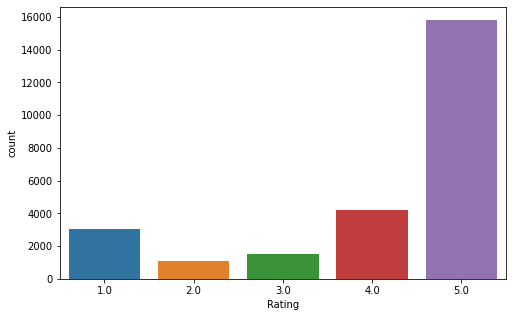

In [11]:
# Visualize the Distribution :

rcParams['figure.figsize'] = 8,5

sns.countplot(x='Rating',data = review_clean_df)

**Observations :** We have an Imbalanced Dataset with more high ratings than low ratings

## **Semantic Analysis Problem**

**<h3>Problem :</h3>**

Given a review , we can determine whether the review is +ve (Good) or Neutral or  -ve (Bad).

* We can say if a review is good or bad by looking at the review ratings.

*    Rating = 1-2 => Bad
*    Rating = 3 => Neutral
*    Rating = 4-5 => Good

## **Text Pre-processing :**

* Removing punctuations & numeric values
* Convert all words into lowercase
* Deduplication - Removing duplicate words in 'Reviews'
* Tokenization
* Removing Stopwords
* Stemming or Lemmetization

Refer the below link :
https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

In [12]:
# For example Purpose

s = 'I am Abhishek Tha;pa , how are you? . I am good. The product is amazing. Each of your products amazes me'

**i) Remove Punctuations & Numeric Characters :**

In [13]:
# Function to remove Punctuations & Numeric Characters from each word:

def remove_punc_from_word(word):
  clean_word_lst = [character for character in word if character.isalpha()]
  clean_word = "".join(clean_word_lst)
  return clean_word

# Function to remove Punctuations & Numeric Characters from each reviews :

def remove_punctuation(reviews):
    lst = reviews.split()
    new_lst = []
    # Remove Punctuations from Reviews
    for word in lst:
      if word not in string.punctuation:
        word = remove_punc_from_word(word)
        new_lst.append(word)
    clean_review = ' '.join(new_lst)
    return clean_review

new_s = remove_punctuation(s)
new_s
      

'I am Abhishek Thapa how are you I am good The product is amazing Each of your products amazes me'

**ii) Convert each word into Lowercase :**

In [14]:
# Function to Convert each word into Lowercase :

def turn_lower(review):
  new_lst = []
  review_lst = review.split()
  for word in review_lst:
    word = word.lower()
    new_lst.append(word)
  new_review = ' '.join(new_lst)
  return new_review


new_s = turn_lower(new_s)
new_s

'i am abhishek thapa how are you i am good the product is amazing each of your products amazes me'

**iii) Deduplication (Remove Duplicate words in each reviews):**



In [15]:
# Function to remove Duplicate words in each reviews :

def deduplication(review):
  lst = review.split()
  unique_word_set = set(lst)
  unique_word_lst = list(unique_word_set)
  unique_review = ' '.join(unique_word_lst)
  return unique_review

new_s = deduplication(new_s)
new_s

'your product are amazes me abhishek amazing you of how good products thapa is each the am i'

**iii) Tokenization :**

In [16]:
def tokenize(reviews):
  tokens = reviews.split()
  return tokens

tokens = tokenize(new_s)

tokens

['your',
 'product',
 'are',
 'amazes',
 'me',
 'abhishek',
 'amazing',
 'you',
 'of',
 'how',
 'good',
 'products',
 'thapa',
 'is',
 'each',
 'the',
 'am',
 'i']

**iv) Removing Stopwords :**

In [17]:
# Stopwords from nltk English Library:

stopwords = nltk.corpus.stopwords.words('english')

# Function to remove the Stopwords from each review:

def remove_stopwords(tokens):
    words_list_final = []
    for x in tokens:
      if x not in stopwords:
        words_list_final.append(x)
    return words_list_final

clean_tokens = remove_stopwords(tokens)
clean_tokens

['product', 'amazes', 'abhishek', 'amazing', 'good', 'products', 'thapa']

**v) Lemmatization :**

In [18]:
# Function to Lemmatize the tokens

# Import the Lemmatizer from nltk Library :
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Initialize a Lemmatizer model :
wordnet_lemmatizer = WordNetLemmatizer()

def Lemmatize(tokens):
  lemmatized_token_list = []
  for token in tokens:
    lemmatized_token = wordnet_lemmatizer.lemmatize(token)
    lemmatized_token_list.append(lemmatized_token)
  return lemmatized_token_list

preprocessed_tokens = Lemmatize(clean_tokens)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [19]:
preprocessed_tokens

['product', 'amazes', 'abhishek', 'amazing', 'good', 'product', 'thapa']

**NOTE :** 

* We have defined all the Functions needed for Text Preprocessing. We'll implement them while performing Feature Engineering.

## **Basic Feature Engineering :**

In [66]:
# We'll be using this df for Feature Engineering Purpose :

review_feat_df = review_clean_df.loc[:,['Review','Rating']]

review_feat_df

Review  Rating
index                                                           
0      This product works great. It's exactly what I ...     5.0
1      My carrier said this phone had been activated ...     1.0
2      The picture on this TV is better than any TV I...     5.0
4      Very well-balanced between the highs and the l...     5.0
5      I own 6 of these camera's and every one of the...     1.0
...                                                  ...     ...
30001  I verified this ability by playing Walker Texa...     5.0
30002  We bought this product in August 2018 when goi...     1.0
30003  Better than I thought. Really super, light, fa...     5.0
30004  Don't buy this product until Sony fixes the fr...     1.0
30005  So far love the tv. I have not had it that lon...     5.0

[25682 rows x 2 columns]

**A) Create O/P Class Labels for the Text Semantic Analysis :**

In [22]:
# Create a new feature 'Class' as O/P Labels using 'Rating':

review_feat_df.loc[review_feat_df['Rating'].isin([1.0,2.0]),'Class'] = 'Bad'
review_feat_df.loc[review_feat_df['Rating'].isin([3.0]),'Class'] = 'Neutral'
review_feat_df.loc[review_feat_df['Rating'].isin([4.0,5.0]),'Class'] = 'Good'

review_feat_df

Review  Rating Class
0      This product works great. It's exactly what I ...     5.0  Good
1      My carrier said this phone had been activated ...     1.0   Bad
2      The picture on this TV is better than any TV I...     5.0  Good
4      Very well-balanced between the highs and the l...     5.0  Good
5      I own 6 of these camera's and every one of the...     1.0   Bad
...                                                  ...     ...   ...
30001  I verified this ability by playing Walker Texa...     5.0  Good
30002  We bought this product in August 2018 when goi...     1.0   Bad
30003  Better than I thought. Really super, light, fa...     5.0  Good
30004  Don't buy this product until Sony fixes the fr...     1.0   Bad
30005  So far love the tv. I have not had it that lon...     5.0  Good

[25682 rows x 3 columns]

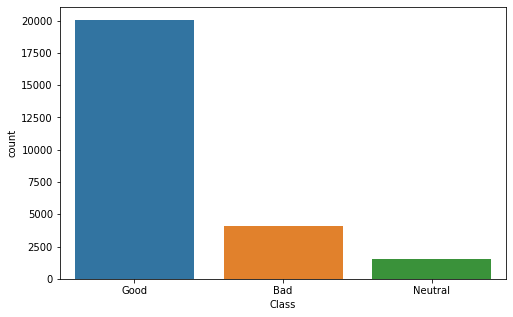

In [23]:
# Visualize the Class Distribution :

sns.countplot(x='Class',data = review_feat_df)

Observation :

* We have a Highly Imbalanced Dataset.
* Most Reviews are 'Good'

**B) Text Preprocessing on 'Review' :**

In [24]:
# Remove Punctuations & Numeric Characters :

review_feat_df['Preprocessed_review']= review_feat_df['Review'].apply(lambda x:remove_punctuation(x))

review_feat_df.loc[:,['Review','Preprocessed_review']].head(5)

Review                                Preprocessed_review
0  This product works great. It's exactly what I ...  This product works great Its exactly what I wa...
1  My carrier said this phone had been activated ...  My carrier said this phone had been activated ...
2  The picture on this TV is better than any TV I...  The picture on this TV is better than any TV I...
4  Very well-balanced between the highs and the l...  Very wellbalanced between the highs and the lo...
5  I own 6 of these camera's and every one of the...  I own  of these cameras and every one of them ...

In [25]:
# Convert the words into Lowercase :

review_feat_df['Preprocessed_review']= review_feat_df['Preprocessed_review'].apply(lambda x:turn_lower(x))

review_feat_df.loc[:,['Review','Preprocessed_review']].head(5)

Review                                Preprocessed_review
0  This product works great. It's exactly what I ...  this product works great its exactly what i wa...
1  My carrier said this phone had been activated ...  my carrier said this phone had been activated ...
2  The picture on this TV is better than any TV I...  the picture on this tv is better than any tv i...
4  Very well-balanced between the highs and the l...  very wellbalanced between the highs and the lo...
5  I own 6 of these camera's and every one of the...  i own of these cameras and every one of them e...

In [26]:
# Convert the words into Lowercase :

review_feat_df['Preprocessed_review']= review_feat_df['Preprocessed_review'].apply(lambda x:deduplication(x))

review_feat_df.loc[:,['Review','Preprocessed_review']].head(5)

Review                                Preprocessed_review
0  This product works great. It's exactly what I ...  looking product what for exactly its was works...
1  My carrier said this phone had been activated ...  been people activated sick getting before am w...
2  The picture on this TV is better than any TV I...  ever make extremely and input again than low f...
4  Very well-balanced between the highs and the l...  your bands what turn lot either only some trac...
5  I own 6 of these camera's and every one of the...  camera make some cameras and another public sa...

In [27]:
# Tokenize the Reviews :

review_feat_df['token']= review_feat_df['Preprocessed_review'].apply(lambda x:tokenize(x))

review_feat_df.loc[:,['Preprocessed_review','token']].head(5)

Preprocessed_review                                              token
0  looking product what for exactly its was works...  [looking, product, what, for, exactly, its, wa...
1  been people activated sick getting before am w...  [been, people, activated, sick, getting, befor...
2  ever make extremely and input again than low f...  [ever, make, extremely, and, input, again, tha...
4  your bands what turn lot either only some trac...  [your, bands, what, turn, lot, either, only, s...
5  camera make some cameras and another public sa...  [camera, make, some, cameras, and, another, pu...

In [28]:
# Remove the Stopwords :

review_feat_df['clean_token']= review_feat_df['token'].apply(lambda x:remove_stopwords(x))

review_feat_df.loc[:,['token','clean_token']].head(5)

token                                        clean_token
0  [looking, product, what, for, exactly, its, wa...          [looking, product, exactly, works, great]
1  [been, people, activated, sick, getting, befor...  [people, activated, sick, getting, walmart, ye...
2  [ever, make, extremely, and, input, again, tha...  [ever, make, extremely, input, low, frame, tv,...
4  [your, bands, what, turn, lot, either, only, s...  [bands, turn, lot, either, track, fact, actual...
5  [camera, make, some, cameras, and, another, pu...  [camera, make, cameras, another, public, okay,...

In [29]:
# Lemmatize the Tokens:

review_feat_df['Lemmatize_token']= review_feat_df['clean_token'].apply(lambda x:Lemmatize(x))

review_feat_df.loc[:,['clean_token','Lemmatize_token']].head(5)

clean_token                                    Lemmatize_token
0          [looking, product, exactly, works, great]           [looking, product, exactly, work, great]
1  [people, activated, sick, getting, walmart, ye...  [people, activated, sick, getting, walmart, ye...
2  [ever, make, extremely, input, low, frame, tv,...  [ever, make, extremely, input, low, frame, tv,...
4  [bands, turn, lot, either, track, fact, actual...  [band, turn, lot, either, track, fact, actuall...
5  [camera, make, cameras, another, public, okay,...  [camera, make, camera, another, public, okay, ...

## **WordCloud Visualization :**

**<h3>Most Frequent Words in the Review :</h3>**

In [42]:
daddy_review = []

for review in review_feat_df['Lemmatize_token']:
    daddy_review += review

daddy_review = ' '.join(daddy_review)

daddy_review

'looking product exactly work great people activated sick getting walmart yet like really said purchased carrier new phone tired ever make extremely input low frame tv better hdrwcg without way high rate ive life experience wonderful whatsoever would game video lag picture latency owned band turn lot either track fact actually treble comfortable bass distortion quality way volume low recording musical band due like probably ascendance get high good loud support headrest head ear ability lastly rest doesnt go occur top given headphone mean wellbalanced dont device camera make camera another public okay bounce client totally worse mehthe time could stay reply test default wireless work really ssid experience havoc connected support others reset also sanding issue downgrade update writing need ghz fails wish connect response firmware reek picture every network whoever pc one see factory main purchase player dvd didt reason mentioned work text daily recived add easy set wear respond one ac

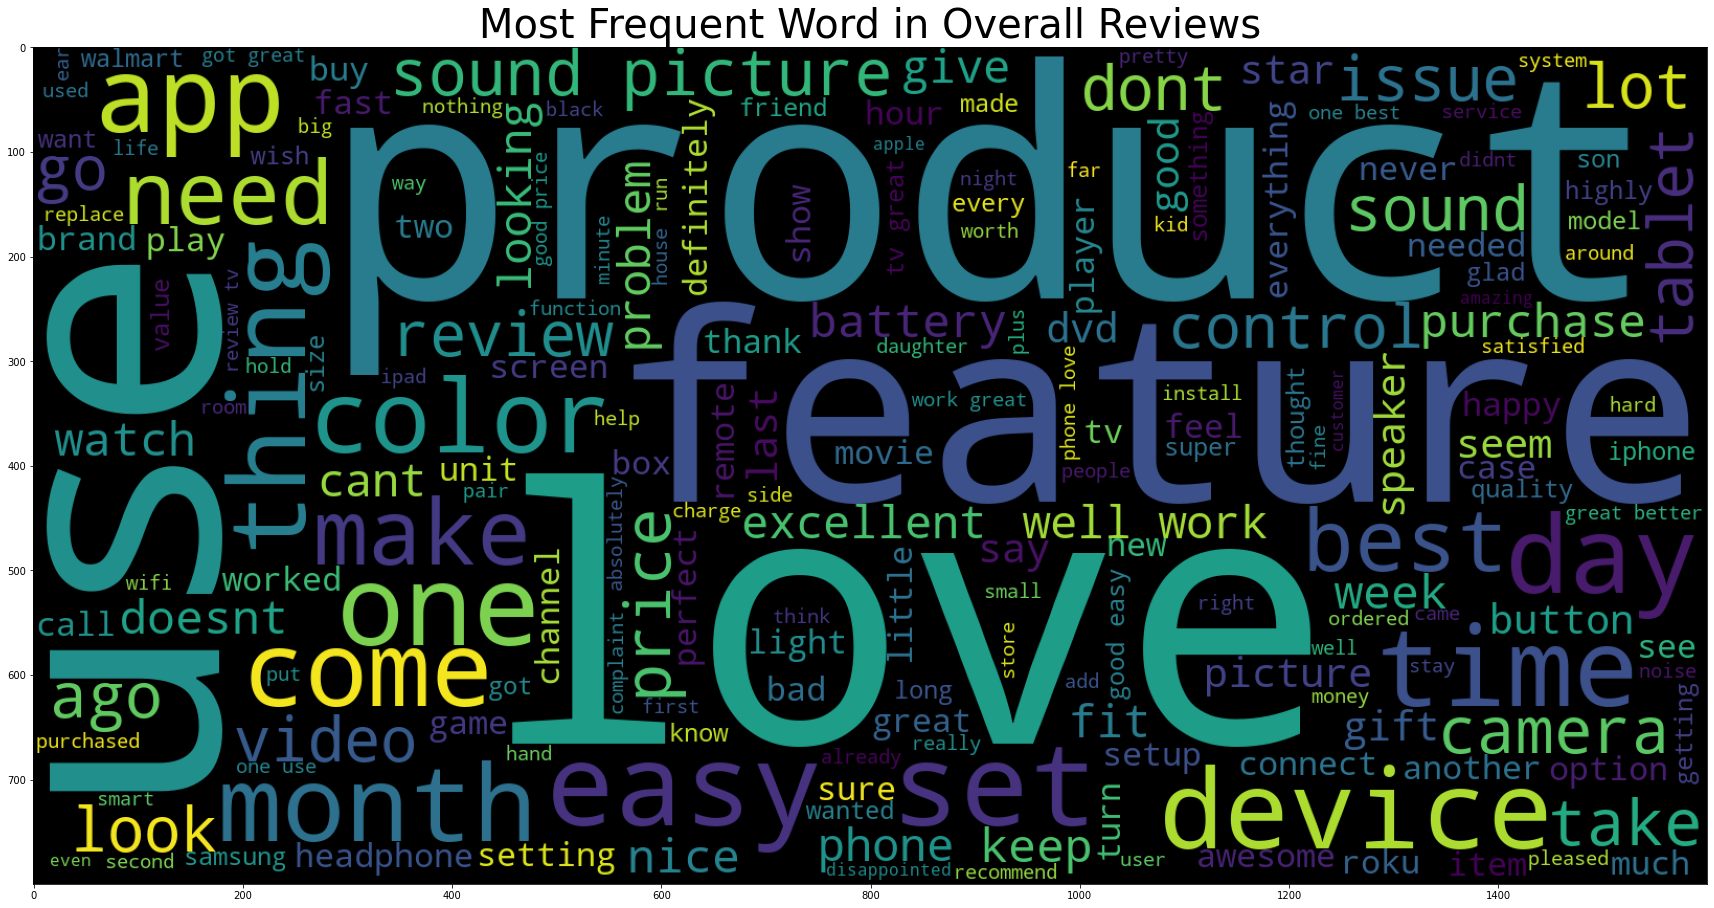

In [46]:
# Import the Wordcloud Library :

from wordcloud import WordCloud

# Generate word cloud :

wordcloud = WordCloud(width = 1600,height = 800).generate(daddy_review)

# Plot the WordCloud :

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("Most Frequent Word in Overall Reviews",fontsize=40)
plt.show()

**<h3>Most Frequent Words in Bad Reviews</h3>**

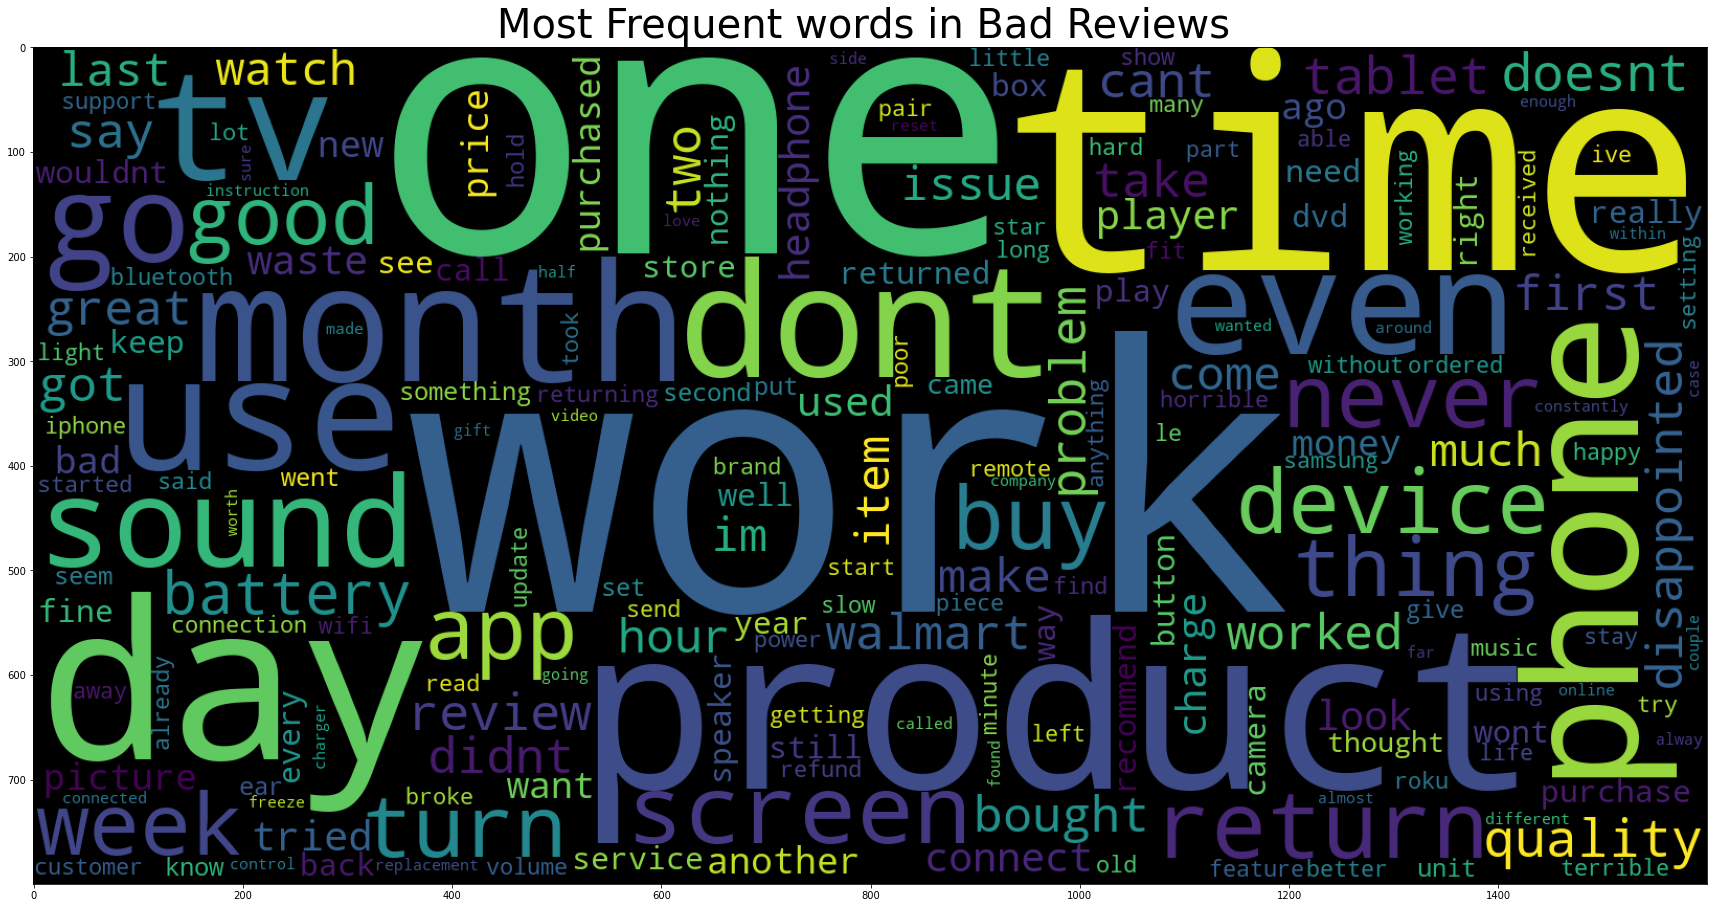

In [47]:
bad_review = []

review_bad = review_feat_df[review_feat_df['Class'] == 'Bad'].loc[:,['Lemmatize_token','Class']]

for review in review_bad['Lemmatize_token']:
    bad_review += review

bad_review = ' '.join(bad_review)

badcloud = WordCloud(width = 1600,height = 800).generate(bad_review)
fig = plt.figure(figsize=(30,20))
plt.imshow(badcloud)
plt.title("Most Frequent words in Bad Reviews ",fontsize=40)
plt.show()

**<h3>Most Frequent Words in Good Reviews</h3>**

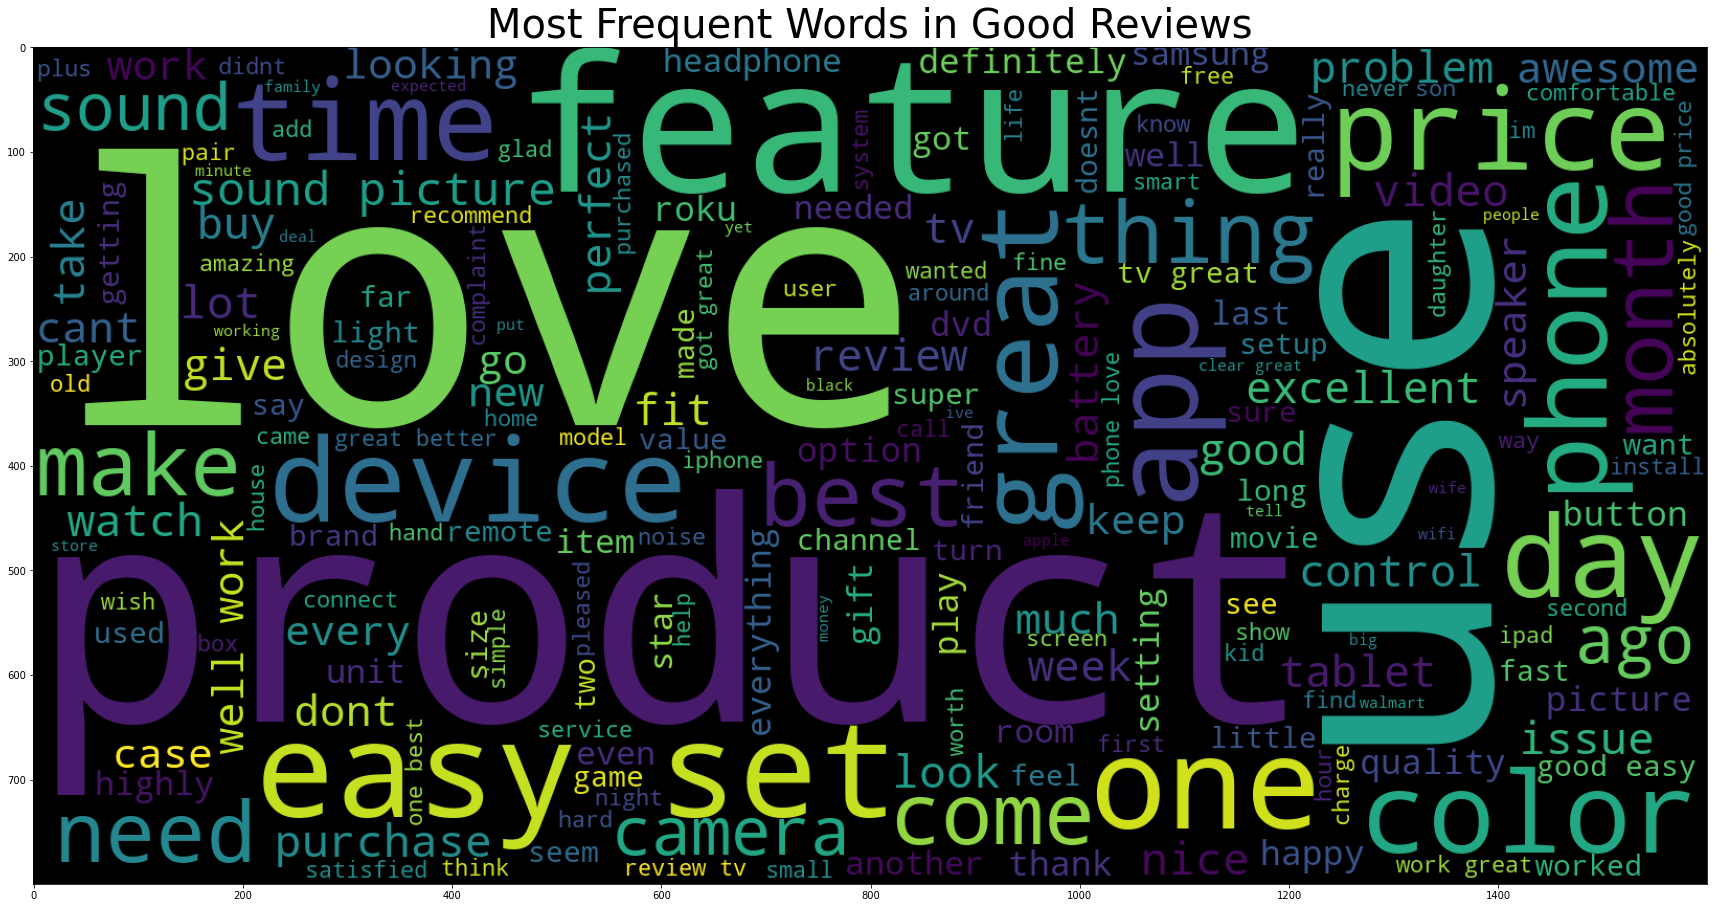

In [48]:
good_review = []

review_good = review_feat_df[review_feat_df['Class'] == 'Good'].loc[:,['Lemmatize_token','Class']]

for review in review_good['Lemmatize_token']:
    good_review += review

good_review = ' '.join(good_review)

goodcloud = WordCloud(width = 1600,height = 800).generate(good_review)
fig = plt.figure(figsize=(30,20))
plt.imshow(goodcloud)
plt.title("Most Frequent Words in Good Reviews",fontsize=40)
plt.show()

## **Export the Featurized DataFrame into a CSV file**

In [50]:
# Let's extract just the Tokenized Features & Class Label Features : 

features_df = review_feat_df.loc[:,['Lemmatize_token','Class']]

features_df

Lemmatize_token Class
0               [looking, product, exactly, work, great]  Good
1      [people, activated, sick, getting, walmart, ye...   Bad
2      [ever, make, extremely, input, low, frame, tv,...  Good
4      [band, turn, lot, either, track, fact, actuall...  Good
5      [camera, make, camera, another, public, okay, ...   Bad
...                                                  ...   ...
30001  [walker, side, playing, low, le, clear, excell...  Good
30002  [disk, tried, weve, fighting, worked, got, tho...   Bad
30003  [thought, light, super, amazing, fast, better,...  Good
30004   [freezing, product, fix, issue, buy, sony, dont]   Bad
30005  [long, getting, tv, save, money, got, run, far...  Good

[25682 rows x 2 columns]

In [63]:
# Export the DataFrame into csv & Download the .csv file :

from google.colab import files
features_df.to_csv('Walmart_Features.csv')
files.download('Walmart_Features.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>